# Unit 5 - Financial Planning


In [1]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Create variables for current amount of crypto assets

my_btc = 1.2

my_eth = 5.3

In [4]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

btc_current_price = requests.get(btc_url)

# Fetch current ETH price

eth_current_price = requests.get(eth_url)

# Parse JSON

btc_data = btc_current_price.json()
eth_data = eth_current_price.json()

current_btc_price = (btc_data['data']['1']['quotes']['USD']['price'])

current_eth_price = (eth_data['data']['1027']['quotes']['USD']['price'])

# Compute current value of my crpto

my_btc_value = current_btc_price * my_btc

my_eth_value = current_eth_price * my_eth

total_crypto_wallet = my_btc_value + my_eth_value

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total value of your crypto is ${total_crypto_wallet:.02f}")

The current value of your 1.2 BTC is $39598.80
The current value of your 5.3 ETH is $10798.54
The total value of your crypto is $50397.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Check classification

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format

today = pd.Timestamp("2021-06-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

df_SPY_AGG_closing = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame

df_SPY_AGG_closing

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-06-16 00:00:00-04:00  115.07  115.1285  114.51  114.63  7527672  424.63   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-16 00:00:00-04:00  424.87  419.92  422.12  73638324

In [9]:
# Pick AGG and SPY close prices

agg_close_price = df_SPY_AGG_closing['AGG']['close']
spy_close_price = df_SPY_AGG_closing['SPY']['close']

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price[0]}")
print(f"Current SPY closing price: ${spy_close_price[0]}")

Current AGG closing price: $114.63
Current SPY closing price: $422.12


In [10]:
# Compute the current value of shares
# Print current value of share

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
total_shares_value = my_spy_value + my_agg_value
print(f"The current value of your SPY shares is ${my_spy_value[0]:.02f}")
print(f"The current value of your AGG shares is ${my_agg_value[0]:.02f}")
print(f"The total value of your SPY and AGG shares is ${total_shares_value[0]:.02f}")

The current value of your SPY shares is $21106.00
The current value of your AGG shares is $22926.00
The total value of your SPY and AGG shares is $44032.00


### Savings Health Analysis

In [11]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame

savings = [['crypto', total_crypto_wallet],['shares', 44057.30]]
df_savings = pd.DataFrame(savings, columns = ['','amount'])

# Display savings DataFrame

df_savings

,,amount
0,crypto,50397.338
1,shares,44057.300


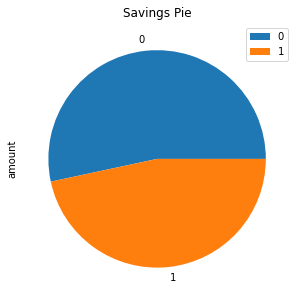

In [12]:
# Plot savings pie chart

plot = df_savings.plot.pie(y = 'amount',figsize =(5,5), title = "Savings Pie")

In [13]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = (total_shares_value + total_crypto_wallet)[0]
difference = emergency_fund - total_savings

# Validate saving health

if total_savings > emergency_fund:
    print('congratulations for having enough money in this fund!')
elif total_savings == emergency_fund:
    print('congratulations for reaching this financial goal!')
elif total_savings < emergency_fund:
   print(f'you need ${difference} to reach your goal!')

congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2016-06-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-16', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG

df_five_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data

df_five_year

AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.160   1364100.0   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.830   2883305.0   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.850  12016805.0   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.640   2457876.0   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.490   2201175.0   
...                           ...       ...       ...      ...         ...   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300   3665931.0   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240   3470062.0   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970   2999623.0   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995   5842592.0   
2021-06-16 00:00:00-04:00  115.07  115.1285  114.5100  114.630   7527672.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-06-26 00:00:00-04:00     NaN      NaN      NaN     NaN         NaN  
2017-06-27 00:00:00-04:00  243.04  243.380  241.310  241.36  60858189.0  
2017-06-28 00:00:00-04:00  242.50  243.715  242.230  243.46  50076355.0  
2017-06-29 00:00:00-04:00  243.66  243.720  239.955  241.39  87799860.0  
2017-06-30 00:00:00-04:00  242.26  242.710  241.575  241.77  50347309.0  
...                           ...      ...      ...     ...         ...  
2021-06-10 00:00:00-04:00  422.96  424.630  421.550  423.58  43574416.0  
2021-06-11 00:00:00-04:00  424.19  424.420  422.820  424.32  37014839.0  
2021-06-14 00:00:00-04:00  424.43  425.290  423.100  425.29  33128340.0  
2021-06-15 00:00:00-04:00  425.43  425.460  423.540  424.50  42885806.0  
2021-06-16 00:00:00-04:00  424.63  424.870  419.920  422.12  73638324.0  

[1001 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

thirty_year_function = MCSimulation(
    portfolio_data = df_five_year,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 7560
)

In [17]:
# Printing the simulation input data

thirty_year_function.portfolio_data.head()

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.16   1364100.0   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.83   2883305.0   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.85  12016805.0   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.64   2457876.0   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.49   2201175.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-06-26 00:00:00-04:00          NaN     NaN      NaN      NaN     NaN   
2017-06-27 00:00:00-04:00    -0.002996  243.04  243.380  241.310  241.36   
2017-06-28 00:00:00-04:00     0.000182  242.50  243.715  242.230  243.46   
2017-06-29 00:00:00-04:00    -0.001912  243.66  243.720  239.955  241.39   
2017-06-30 00:00:00-04:00    -0.001368  242.26  242.710  241.575  241.77   

                                                    
                               volume daily_return  
time                                                
2017-06-26 00:00:00-04:00         NaN          NaN  
2017-06-27 00:00:00-04:00  60858189.0          NaN  
2017-06-28 00:00:00-04:00  50076355.0     0.008701  
2017-06-29 00:00:00-04:00  87799860.0    -0.008502  
2017-06-30 00:00:00-04:00  50347309.0     0.001574

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

tyr = thirty_year_function.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

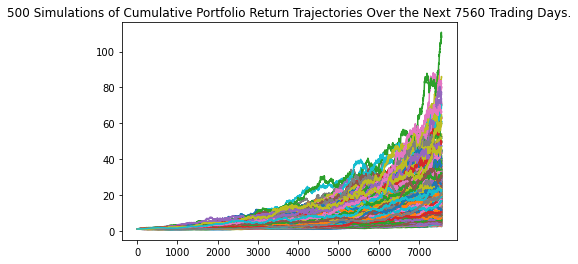

In [23]:
# Plot simulation outcomes

thirty_year_function.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

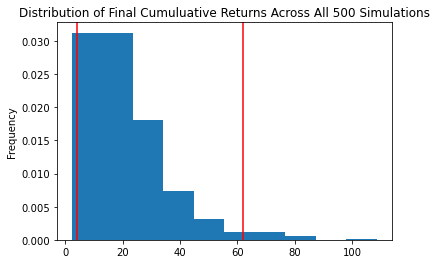

In [24]:
# Plot probability distribution and confidence intervals

thirty_year_function.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = thirty_year_function.summarize_cumulative_return()
print("------Summary Statistics------")
print(tbl)

------Summary Statistics------
count           500.000000
mean             21.182377
std              14.729057
min               2.401781
25%              10.475805
50%              17.423512
75%              27.858547
max             108.547834
95% CI Lower      3.945356
95% CI Upper     62.125644
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment

initial_investment_1 = 20000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

print(f"There is a 95% chance that an initial investment of ${initial_investment_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $78907.12 and $1242512.88


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment

initial_investment_2 = 30000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $118360.68 and $1863769.32


In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

five_year_function = MCSimulation(
    portfolio_data = df_five_year,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

five_year_function.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993299,0.986677,0.988098,1.005229,0.995680,0.994980,1.005693,0.995717,0.988187,0.995872,...,0.997178,1.005015,1.005175,0.996720,1.003168,0.995441,1.004608,1.008040,1.010781,1.008253
2,0.984849,0.990999,1.002631,1.013540,1.006268,0.996861,1.003105,1.010686,1.000149,0.995247,...,1.008570,1.007204,1.017226,0.997345,1.007098,0.985551,0.991195,1.013086,1.004308,1.003726
3,0.995791,0.979473,1.003164,1.010726,1.010548,1.004024,1.016940,1.010073,0.997701,1.001267,...,1.009173,1.000895,1.020236,0.995659,1.003634,0.985219,0.990951,1.016219,1.006504,1.012885
4,1.010549,0.975148,1.001287,1.020161,1.018455,1.014809,1.012361,1.001952,0.997852,1.009924,...,1.011020,0.999038,1.033686,0.984322,1.007085,0.986102,0.993936,1.012582,1.010583,1.011933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.893408,1.555530,1.292726,1.888428,1.995973,1.330980,1.479153,2.589542,1.168516,1.379825,...,1.357753,1.062503,1.891663,1.094890,1.645990,1.248305,1.561216,1.798047,1.423890,2.688997
1257,1.883614,1.561704,1.298466,1.873349,1.980571,1.331296,1.485188,2.569348,1.194736,1.359543,...,1.343387,1.046831,1.880370,1.080544,1.656677,1.251983,1.571277,1.790777,1.430388,2.692068
1258,1.877346,1.553015,1.320035,1.878498,1.961565,1.319577,1.511371,2.577199,1.191304,1.365780,...,1.336081,1.043285,1.884634,1.085702,1.673886,1.253514,1.555253,1.819629,1.427379,2.713535
1259,1.868669,1.542125,1.311669,1.875189,1.970728,1.329599,1.508517,2.545372,1.174793,1.355079,...,1.323618,1.043460,1.860142,1.088594,1.677544,1.260544,1.553956,1.820004,1.425658,2.688660


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

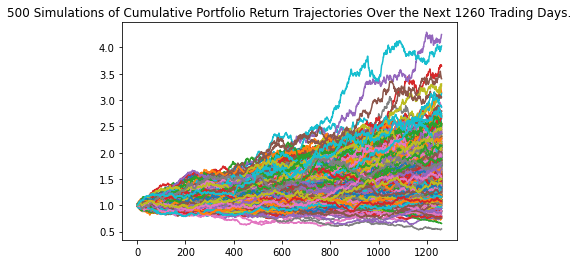

In [31]:
# Plot simulation outcomes
five_year_function.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

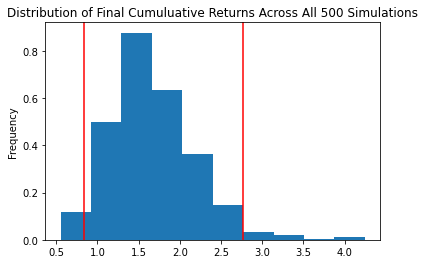

In [32]:
# Plot probability distribution and confidence intervals
five_year_function.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = five_year_function.summarize_cumulative_return()
print("------Summary Statistics------")
print(tbl2)

------Summary Statistics------
count           500.000000
mean              1.669178
std               0.518880
min               0.551481
25%               1.315279
50%               1.586928
75%               1.981282
max               4.245622
95% CI Lower      0.841901
95% CI Upper      2.763905
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_investment_3 = 30000
ci_lower_five = round(tbl2[8]*30000,2)
ci_upper_five = round(tbl2[9]*30000,2)


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 5 years will end within in the range of $25257.03 and $82917.14


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

ten_year_function = MCSimulation(
    portfolio_data = df_five_year,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

ten_year_function.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003295,0.984692,0.979935,0.996454,1.011327,1.004284,0.990524,0.996649,0.993262,1.000688,...,1.002200,0.996350,0.981299,0.998355,0.995143,0.991084,1.001130,0.993891,1.000351,1.009509
2,1.005785,0.985286,0.981693,1.002147,1.019046,0.998089,0.983270,0.990630,0.990595,1.000927,...,1.003458,0.995294,0.992392,1.002399,0.994398,0.989253,0.989022,0.990155,1.014925,1.012241
3,1.004030,0.991414,0.974816,0.998547,1.005899,1.009476,0.980260,0.990106,0.988843,1.003827,...,1.012766,1.002450,0.998355,0.999437,0.996441,0.996703,0.996695,0.986746,1.011058,1.025172
4,1.001420,0.982643,0.971004,1.004835,1.000066,1.018910,0.979134,0.974832,0.988341,1.011098,...,1.010948,1.004487,1.009623,0.979558,1.005874,0.995573,0.992982,0.982102,1.012374,1.034020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.653375,3.538474,1.831056,4.886372,3.869575,2.584003,1.973377,2.167679,3.315671,2.205732,...,1.374656,3.488971,1.832280,2.396454,3.943715,3.170298,1.848910,2.439487,2.093588,2.650133
2517,1.646439,3.506051,1.817039,4.863132,3.886643,2.556913,1.977714,2.154423,3.354548,2.214442,...,1.386007,3.415019,1.809483,2.418294,3.888070,3.158308,1.844971,2.443611,2.072104,2.653229
2518,1.645785,3.544331,1.805860,4.832192,3.856964,2.537579,1.968776,2.157615,3.344066,2.222222,...,1.391656,3.438197,1.803229,2.428528,3.899855,3.142392,1.868576,2.415252,2.059064,2.663592
2519,1.648625,3.509192,1.812220,4.808537,3.834919,2.539571,1.929409,2.163151,3.359366,2.264695,...,1.399108,3.464105,1.807818,2.445217,3.867875,3.120370,1.875112,2.422009,2.072401,2.634296


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

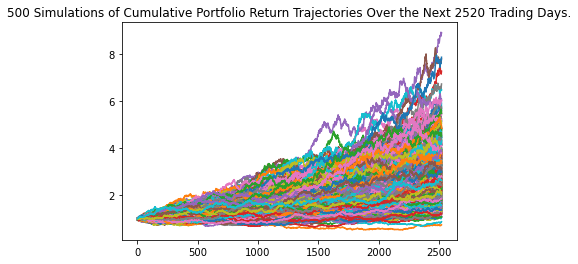

In [38]:
# Plot simulation outcomes
ten_year_function.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

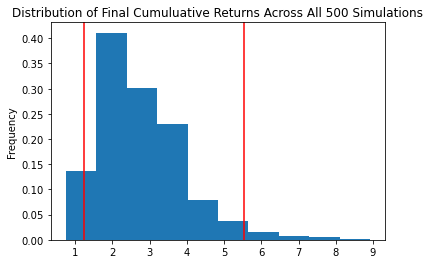

In [39]:
# Plot probability distribution and confidence intervals
ten_year_function.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = ten_year_function.summarize_cumulative_return()
print("------Summary Statistics------")
print(tbl3)

------Summary Statistics------
count           500.000000
mean              2.773755
std               1.156249
min               0.750923
25%               1.945714
50%               2.525347
75%               3.438182
max               8.923889
95% CI Lower      1.233163
95% CI Upper      5.541209
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment_4 = 60000
ci_lower_ten = round(tbl3[8]*60000,2)
ci_upper_ten = round(tbl3[9]*60000,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

print(f"There is a 95% chance that an initial investment of ${initial_investment_4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73989.76 and $332472.54
